In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Q.1 Implement Linear Regression algorithm for Housing price prediction dataset stored as .CSV file. Compute MSE and r2 Score of the classifier, considering few test data sets.

## Linear Regression

In [2]:
df = pd.read_csv('Housing.csv') #used Housing.csv dataset instead of Housing Price dataset(as per question)

In [33]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [37]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [38]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [39]:
df.shape

(545, 13)

In [40]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

## Preprocessing

In [41]:
#handling missing values
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [5]:
df['furnishingstatus'].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [15]:
df.furnishingstatus.unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [42]:
df['area']

0      7420
1      8960
2      9960
3      7500
4      7420
       ... 
540    3000
541    2400
542    3620
543    2910
544    3850
Name: area, Length: 545, dtype: int64

In [43]:
#normalization
#simple feature scaling
#min-max scaling
#z score= x-x_mean/x_std_dev

df['area']= (df['area']-df['area'].mean())/df['area'].std()

In [16]:
df['area']

0      1.045766
1      1.755397
2      2.216196
3      1.082630
4      1.045766
         ...   
540   -0.990968
541   -1.267448
542   -0.705273
543   -1.032440
544   -0.599289
Name: area, Length: 545, dtype: float64

In [44]:
#normalization
#simple feature scaling
#min-max scaling
#z score= x-x_mean/x_std_dev

df['price']= (df['price']-df['price'].mean())/df['price'].std()

In [18]:
df['price']

0      4.562174
1      4.000809
2      4.000809
3      3.982096
4      3.551716
         ...   
540   -1.575421
541   -1.603676
542   -1.612845
543   -1.612845
544   -1.612845
Name: price, Length: 545, dtype: float64

## Data Visualization

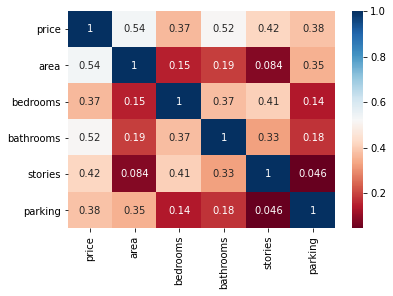

In [3]:
#Correlation
sns.heatmap(df.corr(), annot=True, cmap="RdBu")
plt.show()

In [20]:
# Applying One Hot Coding

df = pd.get_dummies(df, columns=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'])

In [21]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,4.562174,1.045766,4,2,3,2,0,1,1,0,...,0,1,0,0,1,0,1,1,0,0
1,4.000809,1.755397,4,4,4,3,0,1,1,0,...,0,1,0,0,1,1,0,1,0,0
2,4.000809,2.216196,3,2,2,2,0,1,1,0,...,1,1,0,1,0,0,1,0,1,0
3,3.982096,1.082630,4,2,2,3,0,1,1,0,...,1,1,0,0,1,0,1,1,0,0
4,3.551716,1.045766,4,1,2,2,0,1,0,1,...,1,1,0,0,1,1,0,1,0,0


In [4]:
# Separating target variable and its features

Y = df['price']
X = df.drop('price', axis=1)

In [30]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1) 

In [47]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin = lin.fit(X_train, Y_train)
Y_pred = lin.predict(X_test)

In [48]:
lin.intercept_

59281750020751.34

In [49]:
Y_test

62     1.231406
247   -0.115871
142    0.445495
107    0.726177
483   -0.976631
         ...   
201    0.071251
92     0.875875
66     1.156557
284   -0.265568
187    0.183524
Name: price, Length: 109, dtype: float64

In [50]:
from sklearn.metrics import mean_squared_error
r2_score = lin.score(X_train, Y_train)
print(mean_squared_error(Y_test, Y_pred))
print(r2_score)

0.45813564627283215
0.6935107381780186


### Q.2 Use an appropriate data set for building the decision tree and apply this knowledge to classify a new sample.

### Decision Tree

In [7]:
df2 = sns.load_dataset('Iris')

In [8]:
df2.shape

(150, 5)

In [9]:
df2.isnull().sum(axis=0)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x = df2.iloc[:,:-1]
y = df2.iloc[:,-1]

### When test size = 0.2

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)  #When test size = 0.2

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dt_model = DecisionTreeClassifier(criterion="entropy", random_state=0, max_depth=3, min_samples_leaf=4)

In [1]:
dt_model.fit(x_train,y_train)

NameError: name 'dt_model' is not defined

In [16]:
dt_model.score(x_train,y_train)

0.9833333333333333

In [17]:
dt_model.score(x_test,y_test)

0.9666666666666667

In [18]:
y_pred = dt_model.predict(x_test)

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [20]:
confusion_matrix(y_test,y_pred)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

In [21]:
accuracy_score(y_test,y_pred)*100

96.66666666666667

### When Test size = 0.3

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) #When test size = 0.3

In [25]:
dt_model = DecisionTreeClassifier(criterion="entropy", random_state=0, max_depth=3, min_samples_leaf=4 )

In [26]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=4,
                       random_state=0)

In [27]:
dt_model.score(x_train,y_train)

0.9809523809523809

In [28]:
dt_model.score(x_test,y_test)

0.9555555555555556

In [29]:
y_pred = dt_model.predict(x_test)

In [30]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)

In [31]:
accuracy_score(y_test,y_pred)*100

95.55555555555556